
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 3 <br>
</div>


---



### Full Name : kousha moeini
### Student Number : 401100228
___

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

First, read the image:

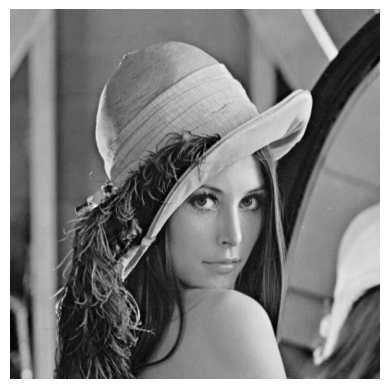

In [ ]:
gray = cv2.imread("../assets/images/lena.png", 0)
plt.axis('off')
plt.imshow(gray, cmap="gray")

Complete the sp function below to add random salt and pepper noise to the image with rate n. generate noisy images with rates 0.1, 0.2, 0.3, ... ,1.

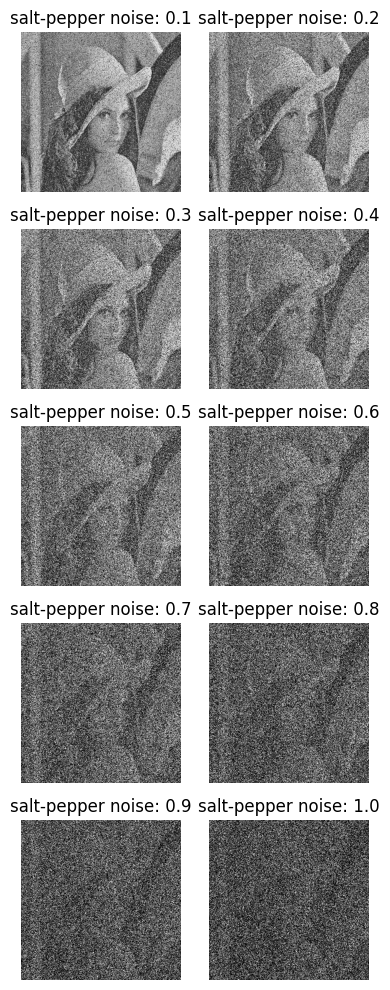

In [3]:
def sp(pic, n):
    noise_img = pic.copy()
    total_pixels = pic.size
    num_noise = int(total_pixels * n)

    coords = np.random.randint(0, pic.shape[0], num_noise), np.random.randint(0, pic.shape[1], num_noise)
    noise_img[coords] = 255

    coords = np.random.randint(0, pic.shape[0], num_noise), np.random.randint(0, pic.shape[1], num_noise)
    noise_img[coords] = 0

    return noise_img

a = []
for i in range(1, 11):
    a.append(sp(gray, 0.1 * i))

fig, axes = plt.subplots(5, 2, figsize=(4, 10))
axes = axes.flatten()

for idx, (ax, img) in enumerate(zip(axes, a)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"salt-pepper noise: {np.round((idx + 1) * 0.1, 2)}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Implement a function that takes a noisy image as input and applies a mean filter of size kernel_size * kernel_size on it. Use numpy only.



In [4]:
def apply_mean_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.mean(region)

    return filtered_image.astype(image.dtype)


In [5]:
def display_results(noisy_image, method_function, filter_name):
    pics = [noisy_image]
    titles = ["Original noisy image"]
    kernel_sizes = [3, 5, 7]
    for i, k in enumerate(kernel_sizes):
        filtered_image = method_function(a[0], k)
        pics.append(filtered_image)
        titles.append(f"{filter_name} filter with kernel size {k}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for idx, (ax, img) in enumerate(zip(axes, pics)):
        ax.imshow(img, cmap='gray')
        ax.set_title(titles[idx])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


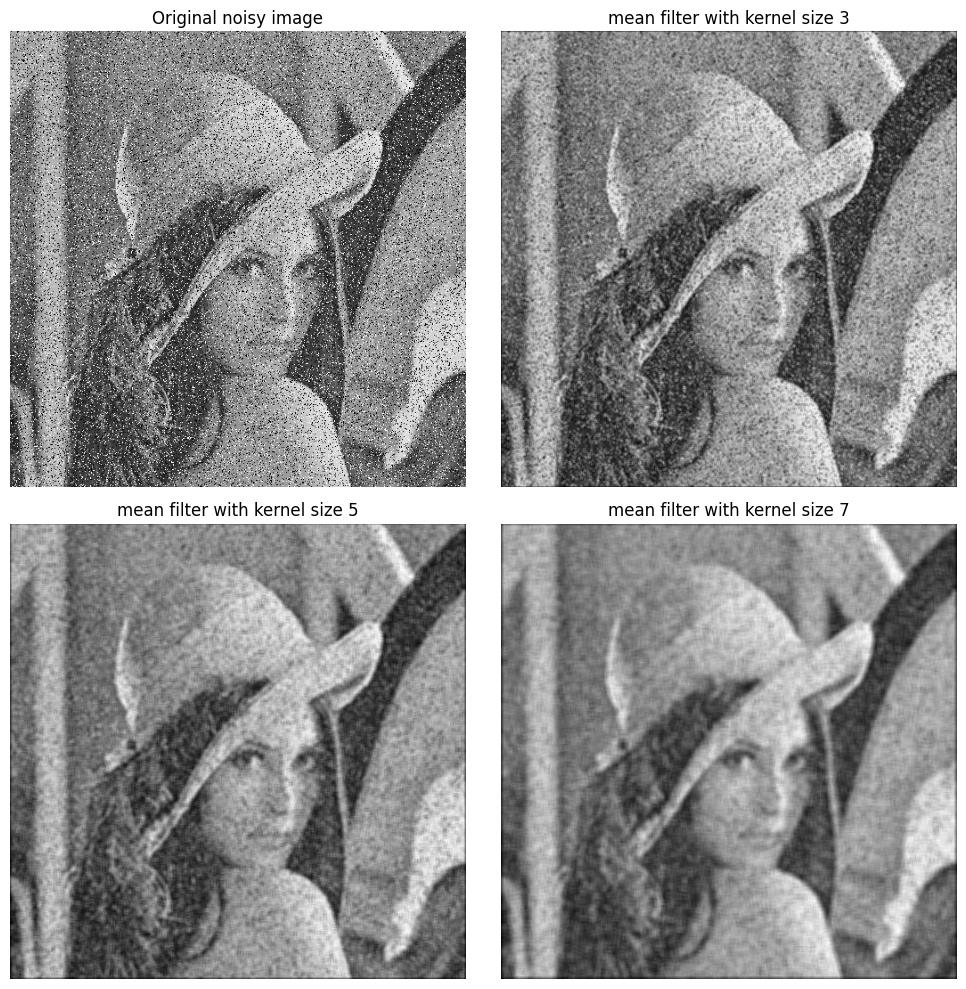

In [6]:
display_results(a[0], apply_mean_filter, filter_name="mean")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 mean filter.

###Your Answer:
تفاوت بین خروجی فیلترهای میانگین با اندازه‌های مختلف به میزان هموارسازی تصویر مربوط است:
- **فیلتر ۳×۳:** کمترین میزان هموارسازی را دارد و جزئیات تصویر بهتر حفظ می‌شود.
- **فیلتر ۵×۵:** هموارسازی متوسط با کاهش بیشتر نویز اما از بین رفتن نسبی جزئیات.
- **فیلتر ۷×۷:** هموارسازی قوی‌تر و حذف بیشتر نویز، ولی با محو شدن لبه‌ها و جزئیات ظریف تصویر.

افزایش اندازه کرنل باعث کاهش نویز بیشتر، اما با هزینه‌ی از بین رفتن وضوح تصویر می‌شود.

Use cv2's built-in function(s) to do the same as the mean filter you implemented above.



In [13]:
def builtin_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

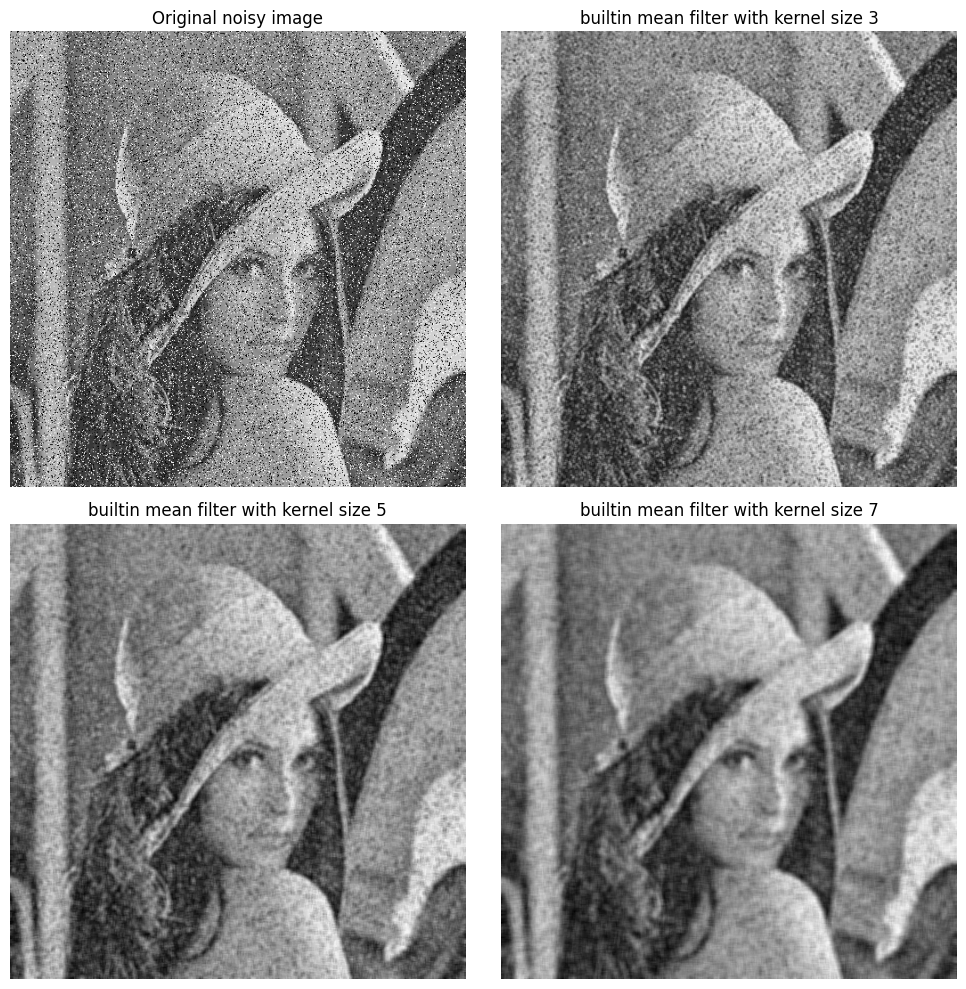

In [8]:
display_results(a[0], builtin_mean_filter, filter_name="builtin mean")

Implement a function that takes a noisy image as input and applies a median filter of size kernel_size * kernel_size on it. Use numpy only.


In [9]:
def apply_median_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(region)

    return filtered_image


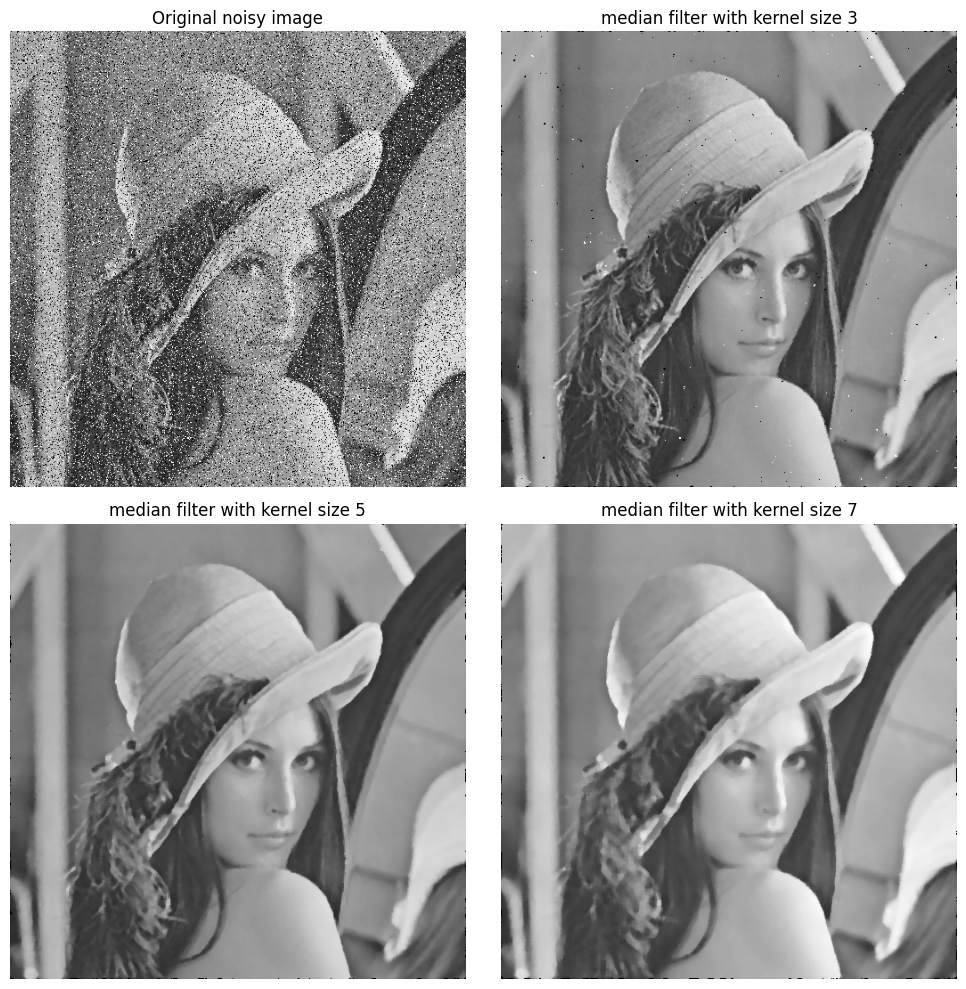

In [10]:
display_results(a[0], apply_median_filter, filter_name="median")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 median filter.

###Your Answer:
### تفاوت بین خروجی فیلترهای میانه ۳×۳، ۵×۵ و ۷×۷

تفاوت اصلی بین این فیلترها به اندازه‌ی پنجره‌ی فیلتر و نحوه‌ی عملکرد فیلتر میانه در حذف نویز و حفظ جزئیات تصویر بستگی دارد:

- **فیلتر میانه ۳×۳:**
  - پنجره‌ای کوچک دارد و تأثیر آن فقط روی ناحیه‌های خیلی محلی است.
  - برای حذف نویزهای نمک و فلفلی کوچک مؤثر است.
  - لبه‌ها و جزئیات تصویر را به خوبی حفظ می‌کند.

- **فیلتر میانه ۵×۵:**
  - ناحیه بزرگ‌تری را دربر می‌گیرد و میانگین‌گیری میانه را روی تعداد بیشتری از پیکسل‌ها انجام می‌دهد.
  - در حذف نویزهای شدیدتر مؤثرتر است ولی ممکن است برخی جزئیات ریز تصویر را نیز کاهش دهد.

- **فیلتر میانه ۷×۷:**
  - بزرگ‌ترین پنجره را دارد و بیشترین میزان صاف‌سازی (smoothing) را انجام می‌دهد.
  - برای حذف نویزهای بسیار شدید مناسب است اما لبه‌ها و جزئیات ظریف ممکن است از بین بروند.

در مجموع، هر چه اندازه‌ی فیلتر بزرگ‌تر باشد، توانایی حذف نویز بیشتر است ولی از دقت و جزئیات تصویر کاسته می‌شود.


Use cv2's built-in function(s) to do the same as the median filter you implemented above.

In [12]:
def builtin_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image


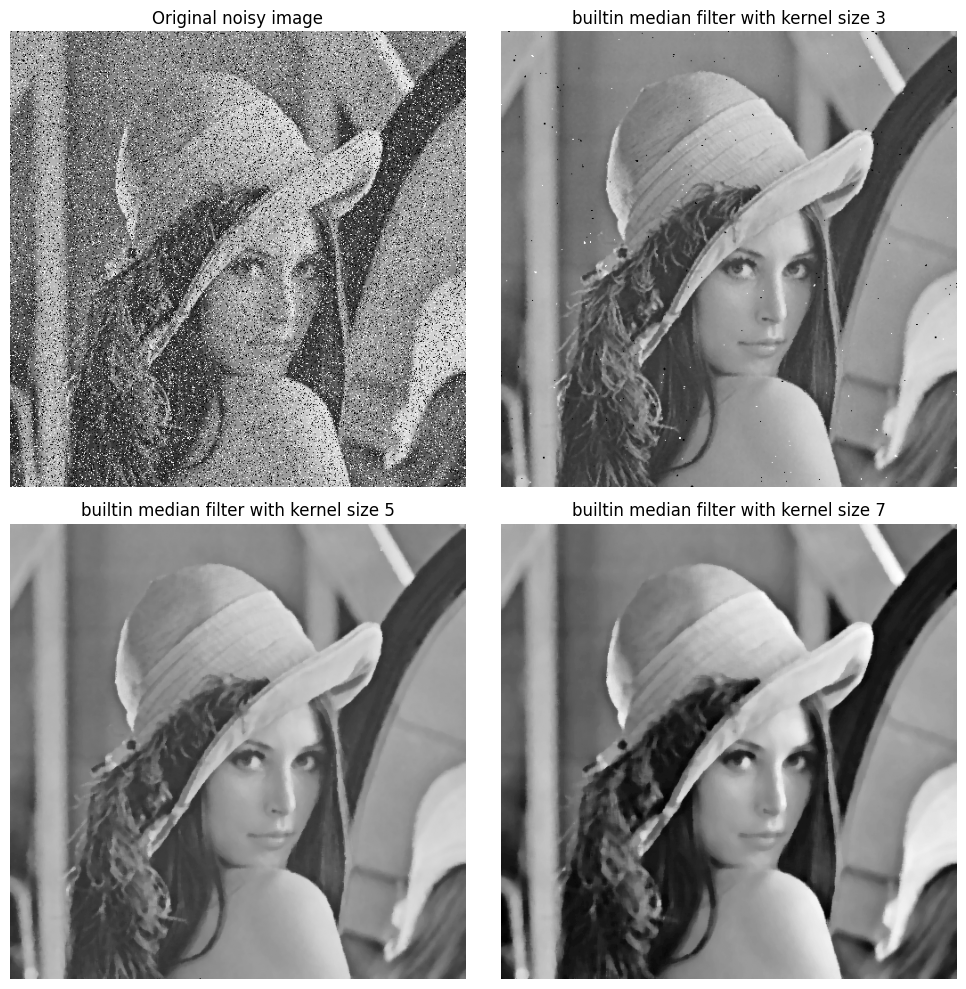

In [14]:
display_results(a[0], builtin_median_filter, filter_name="builtin median")

###Theory Question:
Explain the reason behind the differences between the outputs of a mean and median filter of the same size. Which one performs better on the task of removing salt and pepper noise? why?

###Your Answer:

هر دو فیلتر میانگین و میانه برای کاهش نویز و صاف کردن تصویر استفاده می‌شوند، اما روش عملکرد و تأثیر آنها متفاوت است.

---

#### فیلتر میانگین:
در این فیلتر، مقدار هر پیکسل با میانگین مقادیر پیکسل‌های اطرافش جایگزین می‌شود. اگر تصویر شامل نویزهای شدید مانند نویز نمک و فلفلی باشد، این نویزها روی میانگین تأثیر زیادی می‌گذارند و ممکن است باعث محوشدن لبه‌ها و جزئیات تصویر شوند. به عبارت دیگر، فیلتر میانگین نسبت به نویزهای شدید حساس است و ممکن است کیفیت تصویر را کاهش دهد.

---

#### فیلتر میانه:
این فیلتر مقدار هر پیکسل را با میانه مقادیر اطراف آن جایگزین می‌کند. چون میانه تحت تأثیر پیکسل‌های پرت قرار نمی‌گیرد، در حذف نویزهای نمک و فلفلی بسیار مؤثرتر است و لبه‌ها و جزئیات تصویر را بهتر حفظ می‌کند.

---

### کدام بهتر است برای حذف نویز نمک و فلفلی؟

فیلتر میانه عملکرد بهتری دارد، زیرا می‌تواند نویزهای شدید و پراکنده را به خوبی حذف کند بدون اینکه باعث محوشدن لبه‌ها شود. در حالی که فیلتر میانگین ممکن است به خاطر تأثیر نویزهای پرت، تصویر را بیش از حد صاف کند و جزئیات را از بین ببرد.
